# Feature Extraction With Librosa

In [1]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
x, sr = librosa.load('E:/music_genre_classification/musicFile.mp3')

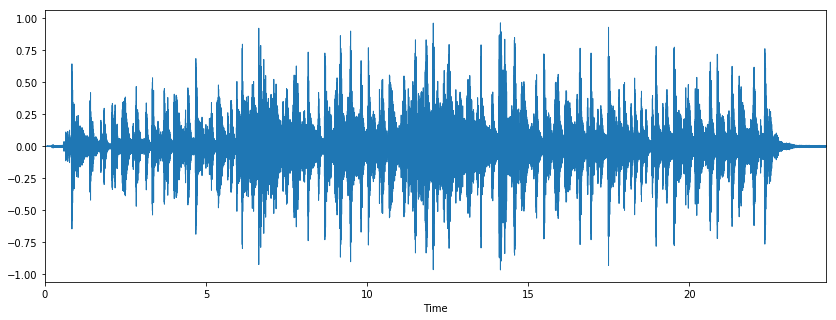

In [2]:
plt.figure(figsize = (14, 5))
librosa.display.waveplot(x, sr)

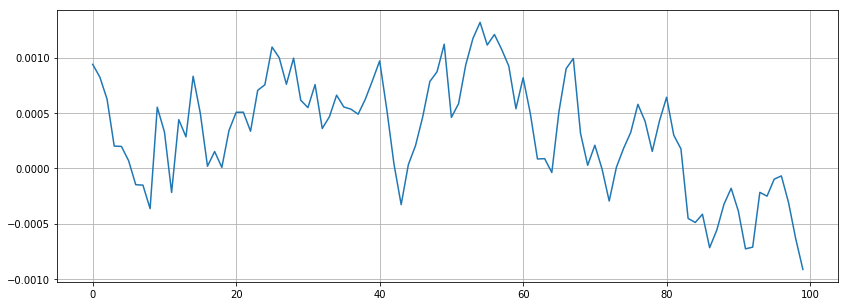

In [3]:
# zero crossing rate - rate of sign change

# zooming in
n0 = 2000
n1 = 2100
plt.figure(figsize = (14, 5))
plt.plot(x[n0: n1])
plt.grid()

There appear to be 11 zero crossings

In [4]:
# verifying with librosa
zero_crossings = librosa.zero_crossings(x[n0:n1], pad = False)
print(sum(zero_crossings))

11


In [5]:
# spectral centroid - "centre of mass"
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(1045,)

In [6]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [7]:
# normalise spectral centroids for visualisation
from sklearn.preprocessing import minmax_scale
def normalize(x, axis = 0):
    return minmax_scale(x, axis = axis)

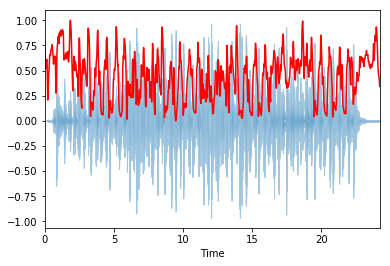

In [8]:
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')